In [2]:
#If you need to install in modules in jupyter notebook 
# %pip install scikit-learn
# %pip install pandas
# %pip install matplotlib 

#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [17]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv')

In [18]:
import pandas as pd
from sklearn import preprocessing

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation","Legendary"]) #Removed columns with names

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

# removing extreme outliers
# statesData = statesData[statesData["cases"].between(statesData["cases"].quantile(.15), statesData["cases"].quantile(.85))]
# statesData = statesData[statesData["deaths"].between(statesData["deaths"].quantile(.15), statesData["deaths"].quantile(.85))]

In [19]:
print(df)

            0         1         2         3         4         5         6
0    0.233898  0.173228  0.251429  0.195556  0.323529  0.214286  0.228571
1    0.381356  0.232283  0.325714  0.257778  0.411765  0.285714  0.314286
2    0.584746  0.311024  0.440000  0.346667  0.529412  0.380952  0.428571
3    0.218644  0.149606  0.268571  0.168889  0.294118  0.142857  0.342857
4    0.381356  0.224409  0.337143  0.235556  0.411765  0.214286  0.428571
..        ...       ...       ...       ...       ...       ...       ...
746  0.711864  0.421260  0.542857  0.515556  0.417647  0.357143  0.514286
747  0.711864  0.192913  0.542857  0.644444  0.529412  0.619048  0.257143
748  0.711864  0.311024  0.600000  0.244444  0.823529  0.523810  0.371429
749  0.847458  0.311024  0.885714  0.244444  0.941176  0.523810  0.428571
750  0.711864  0.311024  0.600000  0.511111  0.705882  0.333333  0.371429

[751 rows x 7 columns]


In [6]:
# removing extreme outliers
# statesData = statesData[statesData["cases"].between(statesData["cases"].quantile(.15), statesData["cases"].quantile(.85))]
# statesData = statesData[statesData["deaths"].between(statesData["deaths"].quantile(.15), statesData["deaths"].quantile(.85))]



In [7]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

min

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64

max

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
dtype: float64

mean

0    0.412411
1    0.266416
2    0.405593
3    0.296642
4    0.354194
5    0.238615
6    0.352041
dtype: float64

median

0    0.423729
1    0.251969
2    0.400000
3    0.280000
4    0.323529
5    0.214286
6    0.342857
dtype: float64

standard deviation

0    0.191412
1    0.102150
2    0.170975
3    0.131688
4    0.178023
5    0.130481
6    0.159118
dtype: float64

first quartile

0    0.245763
1    0.192913
2    0.285714
3    0.200000
4    0.205882
5    0.142857
6    0.228571
Name: 0.25, dtype: float64

second quartile

0    0.423729
1    0.251969
2    0.400000
3    0.280000
4    0.323529
5    0.214286
6    0.342857
Name: 0.5, dtype: float64

third quartile

0    0.542373
1    0.311024
2    0.514286
3    0.377778
4    0.470588
5    0.309524
6    0.477143
Name: 0.75, dtype: float64


KeyError: "None of [Index(['Total'], dtype='object')] are in the [columns]"

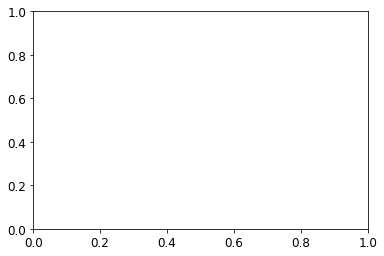

In [20]:
print("min\n")
print(df.min())
print("\nmax\n")
print(df.max())
print("\nmean\n")
print(df.mean(skipna=False))
print("\nmedian\n")
print(df.median())
print("\nstandard deviation\n")
print(df.std())

print("\nfirst quartile\n")
print(df.quantile(0.25))
print("\nsecond quartile\n")
print(df.quantile(0.50))
print("\nthird quartile\n")
print(df.quantile(0.75))
 
boxplot = df.boxplot(column='Total') 
plt.show()
boxplot = df.boxplot(column='HP') 
plt.show()
boxplot = df.boxplot(column='Attack') 
plt.show()
boxplot = df.boxplot(column='Defense') 
plt.show()
boxplot = df.boxplot(column='Sp. Atk') 
plt.show()
boxplot = df.boxplot(column='Sp. Def') 
plt.show()
boxplot = df.boxplot(column='Speed') 
plt.show()
df.hist()